## Consumer

In [1]:
import json
import pandas as pd

import time
import numpy as np
import pylab as pl

from IPython import display

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
def rt_plot(n, val, fig, ax):
    ax.clear()
    ax.set_title(f'test', fontsize=15)
    ax.set_xlabel('xlab_test',  fontsize=14)
    ax.set_ylabel("tlab_test",  fontsize=14)

    ax.scatter(np.arange(n+1), val)
    
    ax.tick_params(labelsize=13)
    
    #clean the whole screen and update with new incoming data
    display.clear_output(wait=True)
    display.display(pl.gcf())

In [3]:
from kafka import KafkaConsumer

KAFKA_HOME = '/root/kafka_2.13-3.2.1'
# kafka server
KAFKA_BOOTSTRAP_SERVERS = ['localhost:9092',]

# definition of the consumer
consumer = KafkaConsumer(bootstrap_servers=KAFKA_BOOTSTRAP_SERVERS, consumer_timeout_ms=20000)


consumer.topics()


{'stream'}

In [5]:
consumer.subscribe('stream')

In [6]:
# print the list of partition IDs 
# e.g. a topic with tree partitions will have partition IDs {0, 1, 2}
consumer.partitions_for_topic('stream')


{0}

In [7]:
# set up the polling strategy for the consumer
consumer.poll(timeout_ms=0,         #<<--- do not enable dead-times before one poll to the next
              max_records=None,     #<<--- do not limit the number of records to consume at once 
              update_offsets=True   #<<--- update the reading offsets on this topic
             )


{}

KeyboardInterrupt: 

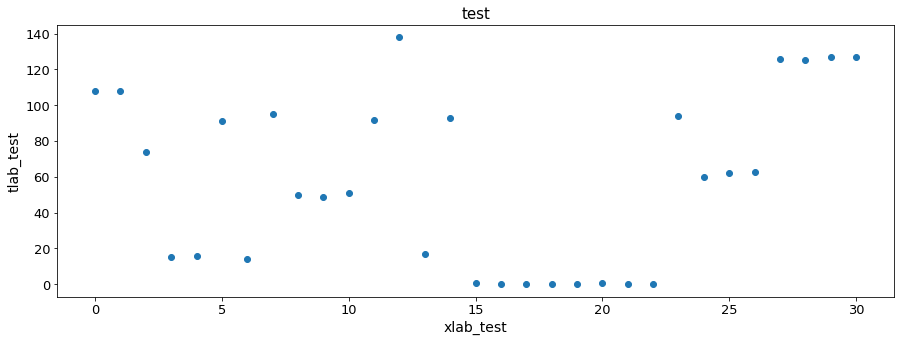

In [8]:
x = []

fig, axes = plt.subplots(figsize = (15,5))

# this consumer will keep polling and reading for 
# messages until stopped (or it reaches the consumer_timeout_ms)
for num,message in enumerate(consumer):
    #print(num, message.value)
    msg = json.loads(message.value)
    print(num, msg['TDC_CHANNEL'])
    x.append(msg['TDC_CHANNEL'])
    #print(num, x)
    rt_plot(num, x, fig, axes)